<a href="https://colab.research.google.com/github/AsifAhmedShodip/Fake-News-Identification-/blob/main/Thesis_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
import seaborn as sns
import wordcloud
import string
from sklearn.feature_extraction.text import TfidfTransformer
from google.colab import drive
import os

# Loading Data

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/THESIS/Files')

data=pd.read_csv('dataset.csv', encoding = 'utf-16')
data.head(4)

Mounted at /content/drive


,title,text,time,link,label,source
0,নাম পরিবর্তনের কথা ভাবছেন ফখা,নিজস্ব মতিবেদক নিজের দাদীর রাখা নাম পরিবর্তন ক...,2013-04-03T08:15:19+00:00,https://motikontho.wordpress.com/2013/04/03/%e...,0,motikontho
1,তজুমদ্দিনে ৯ মৎস্যজীবীর জেল-জরিমানা,ভোলার তজুমদ্দিনে নিষেধাজ্ঞা অমান্য করে মা ইলিশ...,"১৬:৪৩, ১১ অক্টোবর, ২০১৯",https://www.ittefaq.com.bd/wholecountry/96112/...,1,Ittefaq
2,থানায় যোগদানের বর্ষপূর্তিতে বরের বেশে ওসি,বর্ণাঢ্য অনুষ্ঠান ও নৈশভোজের মধ্য দিয়ে সিলেটের...,"১৮:৩১, ১১ অক্টোবর, ২০১৯",https://www.ittefaq.com.bd/wholecountry/96133/...,1,Ittefaq
3,প্রেমিকা ছবিতে লাভ রিয়্যাক্ট না করাতেই ফেসবুক ...,জনপ্রিয় সোশ্যাল মিডিয়া প্লাটফর্ম ফেসবুকের স্বা...,2019-03-14T11:54:55+00:00,https://bengalbeats.com/noakhailla-guy-is-the-...,0,Bengal Beats


# Visualizing Data

In [ ]:
data.describe()

,label
count,4428.000000
mean,0.609530
std,0.487911
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428 entries, 0 to 4427
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4428 non-null   object
 1   text    4428 non-null   object
 2   time    4428 non-null   object
 3   link    4428 non-null   object
 4   label   4428 non-null   int64 
 5   source  4428 non-null   object
dtypes: int64(1), object(5)
memory usage: 207.7+ KB


##Bar Chart

1    2699
0    1729
Name: label, dtype: int64


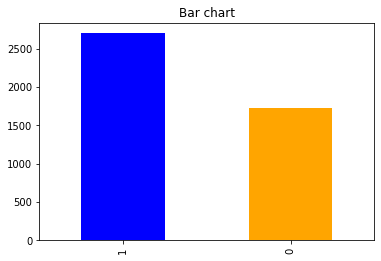

In [ ]:
count_Class=pd.value_counts(data["label"], sort= True)
print(count_Class)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

##Pie Chart

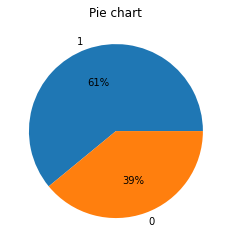

In [ ]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

##More frequent words V1

In [ ]:
count1 = Counter(" ".join(data[data["label"]==True]["text"]).split()).most_common(20)
print(count1)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['label']==False]["text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

[('ও', 7092), ('করে', 4987), ('এ', 4772), ('থেকে', 4461), ('করা', 4238), ('হয়।', 3117), ('হয়েছে।', 2939), ('তার', 2777), ('এক', 2435), ('নিয়ে', 2377), ('বলেন,', 2310), ('উপজেলার', 2283), ('জানান,', 2281), ('পুলিশ', 2258), ('আরও', 2240), ('তিনি', 2231), ('একটি', 2196), ('সময়', 1857), ('এই', 1830), ('জন্য', 1825)]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2469 missing from current font.
  font.set_text(s

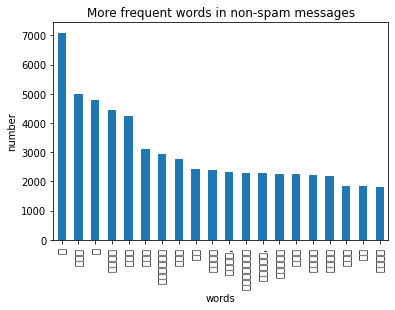

In [ ]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2480 missing from current font.
  font.set_text(s

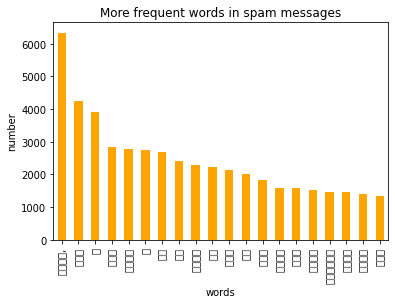

In [ ]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

##More frequent words V2


In [ ]:
data_true  = data[data['label'] == True].copy()
data_false = data[data['label'] == False].copy()
data_true.tail()

,title,text,time,link,label,source
4421,পাটুরিয়া-দৌলতদিয়ার ভোগান্তি লাঘবে পুনরায় চালু ...,পাটুরিয়া-দৌলতদিয়া ঘাটে ভোগান্তি লাঘবে পুনরায় চ...,"২২:৩৪, ১৯ আগস্ট, ২০১৯",https://www.ittefaq.com.bd/wholecountry/80964/...,1,Ittefaq
4422,জলাতঙ্ক রোগে আক্রান্ত গরু জবাইয়ের সময় কসাই আটক,পিরোজপুরের ভাণ্ডারিয়ায় জলাতঙ্ক রোগে আক্রান্ত গ...,"১৪:৫৬, ২২ অক্টোবর, ২০১৯",https://www.ittefaq.com.bd/wholecountry/99212/...,1,Ittefaq
4424,"ভাঙ্গায় ৫ বছরের শিশুকে ধর্ষণ, ধর্ষক আটক",ভাঙ্গা উপজেলার পৌরসদরের পশ্চিম হাসামদিয়া গ্রাম...,"১৪:১৭, ২১ আগস্ট, ২০১৯",https://www.ittefaq.com.bd/wholecountry/81342/...,1,Ittefaq
4425,পরকীয়া সন্দেহে স্বামীর লিঙ্গ কেটে ফেললেন স্ত্রী,নাটোরের সিংড়ায় স্ত্রী কুলসুম বেগম (৩২) কর্তৃক ...,"১৮:৫০, ২৯ আগস্ট, ২০১৯",https://www.ittefaq.com.bd/wholecountry/83779/...,1,Ittefaq
4427,ধামইরহাটে ক্ষুদ্র নৃ-গোষ্ঠীর যুবক খুন,নওগাঁর ধামইরহাটে এক ক্ষুদ্র নৃ-গোষ্ঠীর যুবককে ...,"১৯:৫৮, ১১ অক্টোবর, ২০১৯",https://www.ittefaq.com.bd/wholecountry/96156/...,1,Ittefaq


In [ ]:
count1 = Counter(" ".join(data[data["label"]==True]["text"]).split()).most_common(20)
print(count1)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['label']==False]["text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

[('ও', 7092), ('করে', 4987), ('এ', 4772), ('থেকে', 4461), ('করা', 4238), ('হয়।', 3117), ('হয়েছে।', 2939), ('তার', 2777), ('এক', 2435), ('নিয়ে', 2377), ('বলেন,', 2310), ('উপজেলার', 2283), ('জানান,', 2281), ('পুলিশ', 2258), ('আরও', 2240), ('তিনি', 2231), ('একটি', 2196), ('সময়', 1857), ('এই', 1830), ('জন্য', 1825)]


In [ ]:
data_ham =  data[data['label'] == True].copy()
data_spam = data[data['label'] == False].copy()
total = data.copy()

data_ham.loc[:, 'text'] = data_ham['text'].apply(remove_punctuation_and_stopwords)
words_data_ham = data_ham['text'].tolist()
data_spam.loc[:, 'text'] = data_spam['text'].apply(remove_punctuation_and_stopwords)
words_data_spam = data_spam['text'].tolist()

total.loc[:, 'text'] = total['text'].apply(remove_punctuation_and_stopwords)
total_words = total['text'].tolist()

NameError: ignored

In [ ]:
list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [ ]:
list_spam_words = []
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [ ]:
list_total_words = []
for sublist in total_words:
    for item in sublist:
        list_total_words.append(item)

In [ ]:
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
c_total = Counter(list_total_words)
df_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])
df_toalwords_top30 = pd.DataFrame(c_total.most_common(30), columns=['word', 'count'])

In [ ]:
len(c_total)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_hamwords_top30, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

##Wordcloud

In [ ]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

In [ ]:


show_wordcloud(data_true, "Ham messages")


In [ ]:
show_wordcloud(data_false, "Spam messages")


# Prepocessing Data

## Stopwords

In [ ]:
stopwords=[]

f = open("stopwords-bn.txt", "r")
for x in f:
    stopwords.append(x.rstrip())
f.close()

print(stopwords[100:110])

bangla_numbers = '১২৩৪৫৬৭৮৯০'
english_numbers = '1234567890'

In [ ]:
!pip install py-bangla-stemmer

In [ ]:
from py_bangla_stemmer import BanglaStemmer

stemmer = BanglaStemmer()
stemmer.stem('হিসেবে')

In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
stemmer.stem_word('বাংলায়')

In [ ]:
text = data['text']

voca = {}

def clear_word(word):
    w = ''
    for ch in word:
        if ch not in string.punctuation and ch != '।' and ch not in bangla_numbers and ch not in english_numbers:
            w += ch
            
    return w

for article in text:
    for word in article.split(' '):
        word = clear_word(word)
        if word not in stopwords:
            if voca.get(word) is None:
                voca[word] = 0
            voca[word] += 1
        
        


In [ ]:
sorted_data = sorted(voca.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse = True)
print(len(sorted_data))

most_sig_pair = sorted_data[:1500]


most_sig = []

i = 0
for pair in most_sig_pair:
    if i == 1500:
        break
    most_sig.append(pair[0])
    i += 1
    
print(len(most_sig))

In [ ]:
def remove_punctuation_and_stopwords(doc):
    
    doc_no_punctuation = [ch 
                          for ch in doc 
                          if ch not in string.punctuation 
                          and ch != '।' 
                          and ch not in bangla_numbers
                          and ch not in english_numbers]
    
    doc_no_punctuation = "".join(doc_no_punctuation).split()
    
    #print(doc_no_punctuation)

    doc_no_punctuation_no_stopwords = \
        [word for word in doc_no_punctuation if word not in stopwords and word in most_sig]
    
    
    #print(sms_no_punctuation_no_stopwords)
    gram = []
    
    for i in range(len(doc_no_punctuation_no_stopwords)-1):
        uni_gram = doc_no_punctuation_no_stopwords[i]
        gram.append(uni_gram)
    
    '''for i in range(len(sms_no_punctuation_no_stopwords)-2):
        bi_gram = sms_no_punctuation_no_stopwords[i]+' '+sms_no_punctuation_no_stopwords[i+1]
        gram.append(bi_gram)
        
        
    for i in range(len(sms_no_punctuation_no_stopwords)-3):
        tri_gram = sms_no_punctuation_no_stopwords[i]+' '+sms_no_punctuation_no_stopwords[i+1]+' '+sms_no_punctuation_no_stopwords[i+2]
        gram.append(tri_gram)'''    
            
    #print(gram)
    return gram

In [ ]:
d = data['text'][6:7]
print((d[6]))
print(d.apply(remove_punctuation_and_stopwords)[6])

## CountVectorizer

In [ ]:
f = feature_extraction.text.CountVectorizer(analyzer = remove_punctuation_and_stopwords)
X = f.fit_transform(data["text"])
#f.get_feature_names()

In [ ]:
len(f.get_feature_names())

##TfidfTransformer





In [ ]:
tfidf_transformer = TfidfTransformer().fit(X)
X = tfidf_transformer.transform(X)
X

##Train-Text Split

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], test_size=0.20, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

#Machine Learning Algorithm

**My goal is to predict if a new sms is spam or non-spam. I assume that is much worse misclassify non-spam than misclassify an spam. (I don't want to have false positives)**
<p>
The reason is because I normally don't check the spam messages.<p> The two possible situations are:<p>
1. New spam sms in my inbox. (False negative).<p>
OUTCOME: I delete it.<p>
2. New non-spam sms in my spam folder (False positive).<p>  OUTCOME: I probably don't read it. <p>
I prefer the first option!!!

##Multinomial naive bayes





In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics


list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0


for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 
    
    
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
#models.head(n=10)

best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))

y_pred = bayes.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.precision_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.f1_score(y_test, y_pred))

pd.DataFrame(data = m_confusion_test, columns = ['Predicted False', 'Predicted True'],
            index = ['Actual False', 'Actual True'])

##Support Vector Machine

In [ ]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))


y_pred = svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.precision_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.f1_score(y_test, y_pred))

pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])
#from sklearn.metrics import classification_report
#print(classification_report(svc.predict(X_test), y_test))

##Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.precision_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.f1_score(y_test, y_pred))

m_confusion_test = metrics.confusion_matrix(y_test, clf.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test)

y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.precision_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.f1_score(y_test, y_pred))



m_confusion_test = metrics.confusion_matrix(y_test, model.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

## Decison Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.precision_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.f1_score(y_test, y_pred))


m_confusion_test = metrics.confusion_matrix(y_test, clf.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])


## Checking

In [ ]:
def detect_fake(s):
    return clf.predict([s])[0]
detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

#Deep learning Algorithm

## CNN

In [ ]:
import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant
import sklearn.metrics as metrics

In [ ]:
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

In [ ]:
data=pd.read_csv('dataset.csv', encoding = 'utf-16')
art = data['text']
labels  = data['label']

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(art)
sequences = tokenizer.texts_to_sequences(art)

word_index = tokenizer.word_index
print(word_index)
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

np.shape(data)

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])


x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

In [ ]:
print('Indexing word vectors.')

embeddings_index = {}
with open('bn_w2v_model.text') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs
        

print('Found %s word vectors.' % len(embeddings_index))
#print(embeddings_index['না'])

In [ ]:
print(embeddings_index['উপজেলার'])

In [ ]:
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedded_sequences = embedding_layer(sequence_input)
np.shape(embedded_sequences)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(2, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_val, y_val))

## LSTM

In [ ]:
import keras

def create_rnn_lstm():
    # Add an Input Layer
    input_layer = keras.layers.Input((MAX_SEQUENCE_LENGTH, ))

    # Add the word embedding Layer
    embedding_layer = keras.layers.Embedding(num_words, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = keras.layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = keras.layers.LSTM(300)(embedding_layer)

    # Add the output Layers
    output_layer1 = keras.layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = keras.layers.Dropout(0.25)(output_layer1)
    output_layer2 = keras.layers.Dense(2, activation="sigmoid")(output_layer1)

    # Compile the model
    model = keras.models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

classifier = create_rnn_lstm()

classifier.fit(x_train, y_train,
          batch_size=32,
          epochs=3,
          validation_data=(x_val,y_val))

#Some useful Resources


1.   Pipeline https://www.kaggle.com/jeffysonar/spam-filter-using-naive-bayes-classifier
2.   Bangla PosTagger https://github.com/sunkuet02/BanglaPosTagger
3.   https://github.com/banglakit/awesome-bangla
4.   https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb

In [ ]:
!pip install py-bangla-stemmer

In [ ]:
from py_bangla_stemmer import BanglaStemmer

stemmer = BanglaStemmer()
stemmer.stem('আইডির')

In [ ]:
!pip install bnltk

In [ ]:
from bnltk.pos_tagger import BanglaPosTagger
t = BanglaPosTagger()
print(t.bn_pos_tag(' আমার সোনার বাংলা । আমি তোমায় ভালোবাসি । '))